# Image Classification using Tensorflow

### Import the necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In C:\Users\praju\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\praju\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\praju\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\praju\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\praju\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

### Import the Fashion MNIST dataset present in Tensorflow

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

The dataset on load contains 4 numpy arrays for training and testing purposes.

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The images in the dataset are 28x28 numpy arrays. Each has pixel values in the range 0-255.
The labels are an array of integers in the range 0-9 that represents the class of the cloth which are categorised below by their index.

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Data Exploration

###### Training data

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

###### Testing data

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

### Data Pre-Processing

Inspecting the first image of the training set, we see the pixel values in the range 0-255.

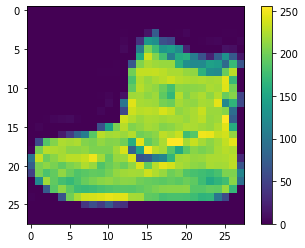

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1.

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Take a look at the first 25 images from the training set and their corresponding class names.

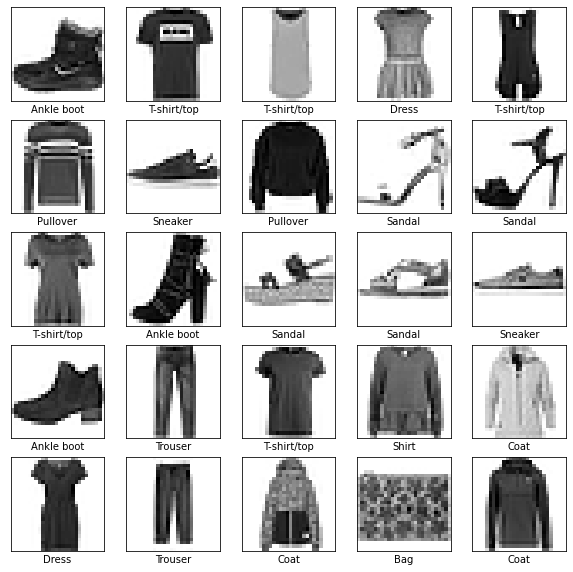

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Building the Model

The neural network we are about to build requires layers. We will make use of three such layers:
- <strong>Flatten Layer</strong>: to transform the format of images from 2-D array to 1-D array.
- <strong>Two Dense Layers</strong>: these two dense layers are closely/fully connected. The first dense layer has 128 nodes and the second return a logits array with length 10. Each node also contains the score which indicates which class the current image belongs to.

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### Compile the Model

The model is ready for training and requires a few more guiding settings:
- <strong>Loss function</strong>: measures how accurate the model is during training.
- <strong>Optimizer</strong>: how the model is updated based on the data it sees and its loss function.
- <strong>Metrics</strong>: used to monitor the training and testing steps.

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the Model

Training the neural network:
- Feed the training data to the model.
- Model learn to associate images and labels.
- Ask model to make predictions.
- Verify the predictions.

###### Feed the Model

In [15]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.4956 - accuracy: 0.8268
Epoch 2/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.3728 - accuracy: 0.8660
Epoch 3/10
60000/60000 [==============================] - 11s 179us/sample - loss: 0.3334 - accuracy: 0.8773
Epoch 4/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.3082 - accuracy: 0.8864
Epoch 5/10
60000/60000 [==============================] - 12s 203us/sample - loss: 0.2920 - accuracy: 0.8926
Epoch 6/10
60000/60000 [==============================] - 12s 196us/sample - loss: 0.2757 - accuracy: 0.8975
Epoch 7/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.2636 - accuracy: 0.9020
Epoch 8/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2555 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.2434 - accuracy: 0.90

###### Evaluate Accuracy

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 2s - loss: 0.3438 - accuracy: 0.8822

Test accuracy: 0.8822


### Make Predictions

In [17]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) # Attach a softmax layer to convert the logits to probabilities
predictions = probability_model.predict(test_images)

The first prediction:

In [18]:
predictions[0]

array([1.0270325e-07, 1.0071145e-10, 2.6733737e-09, 5.9694027e-11,
       1.1366813e-09, 4.9970369e-03, 3.0880013e-08, 1.4848087e-03,
       3.7703670e-11, 9.9351799e-01], dtype=float32)

Prediction is an array of 10 numbers which represents the model's confidence in predicting the label of the image.
Hence, the maximum value in the array corresponds to the model's precition in classifying an image to a particular class.

In [19]:
np.argmax(predictions[0])

9

The model predicts that the image is an 'Ankle Boot'. Take a loot at what the actual class of the image is:

In [20]:
test_labels[0]

9

Hence, our prediction is right!

Functions for a full set of 10 class predictions:

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:               # Correct prediction labels are blue and incorrect prediction labels are red
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

###### Verify the Predictions

Check how the trained model performs for the first image:

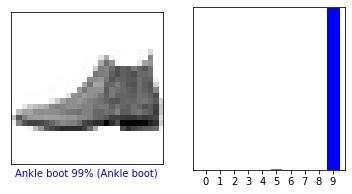

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

How about the 12th image:

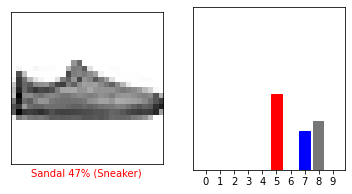

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Plot the first 15 images and their predicted class.

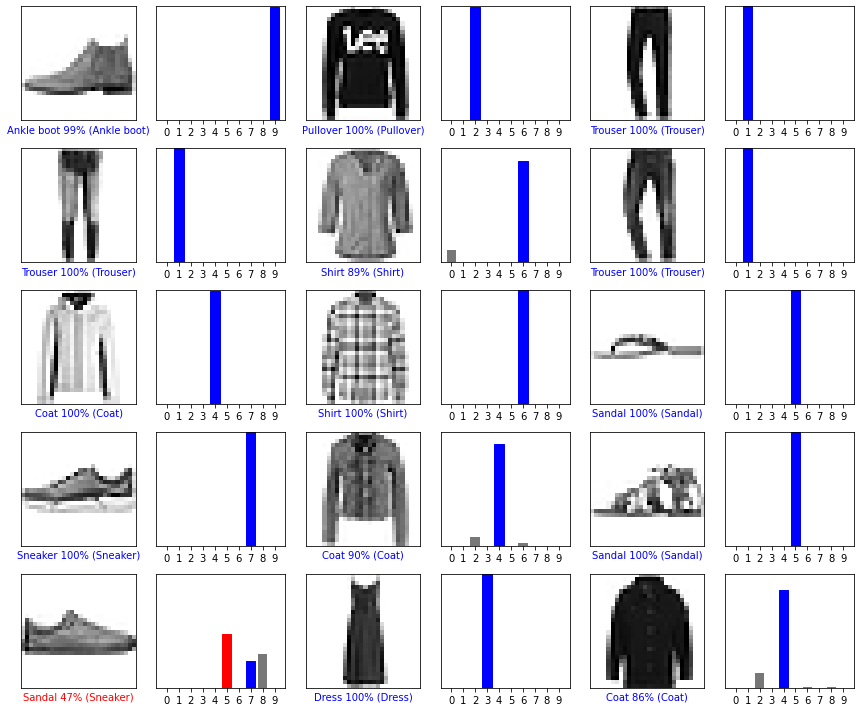

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use the trained model

Use the model to make a prediction on the first image in the test dataset.

In [25]:
img = test_images[1]
print(img.shape)

(28, 28)


In [26]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[9.3824374e-06 3.1595249e-17 9.9873596e-01 1.4256460e-12 9.4458769e-04
  9.9785881e-11 3.1002349e-04 2.0582310e-12 2.8751709e-11 2.1400458e-16]]


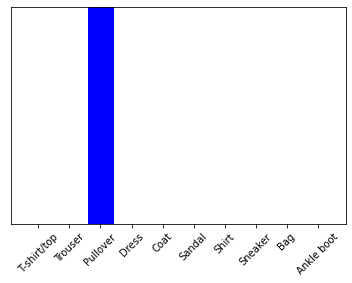

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [29]:
np.argmax(predictions_single[0])

2

The model performs well in predicting the right label for the test set.